In [1]:
import os
from glob import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image

In [2]:
seed = 1

lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 1
no_cuda = False
log_interval = 100

In [3]:
train_paths = glob('../dataset/mnist_png/training/*/*.png')
test_paths = glob('../dataset/mnist_png/testing/*/*.png')

len(train_paths), len(test_paths)

(60000, 10000)

# Preprocess

In [4]:
class Dataset(Dataset):
    def __init__(self, data_paths, transform=None):
        self.data_paths = data_paths
        self.transform = transform

    def __len__(self):
        return len(self.data_paths)

    def __getitem__(self, idx):
        path = self.data_paths[idx]
        image = Image.open(path).convert("L")
        label = int(path.split('\\')[-2])
        
        if self.transform:
            image = self.transform(image)

        return image, label

In [5]:
data_loader = torch.utils.data.DataLoader(
    Dataset(train_paths, 
            transforms.Compose([
                transforms.RandomHorizontalFlip(), 
                transforms.ToTensor(), 
                transforms.Normalize(
                    mean=[0.406], 
                    std=[0.225])])
           ),
    batch_size=batch_size, 
    shuffle=True
)

# Understand Better

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
path = 'lena.jpg'

In [8]:
image = Image.open(path)

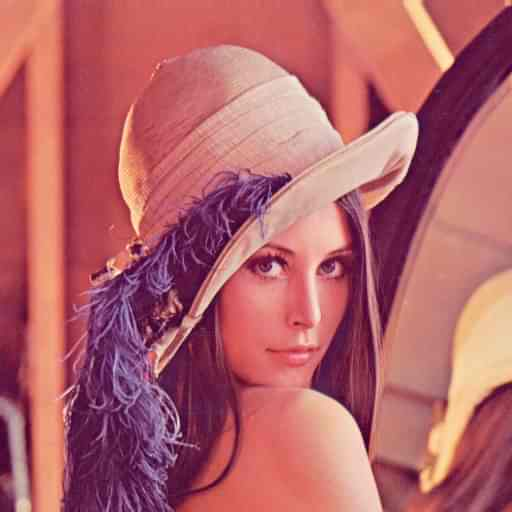

In [9]:
image

In [10]:
import torchvision

In [11]:
np.array(image).shape

(512, 512, 3)

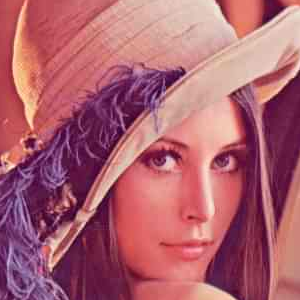

In [12]:
torchvision.transforms.CenterCrop(size=(300, 300))(image)

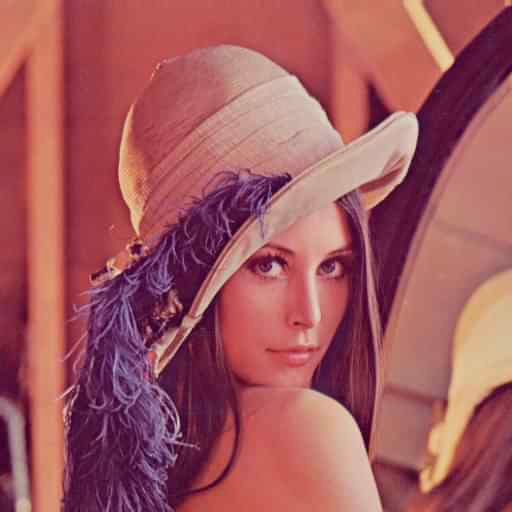

In [13]:
torchvision.transforms.ColorJitter(brightness=1, contrast=0.5, saturation=0, hue=0)(image)

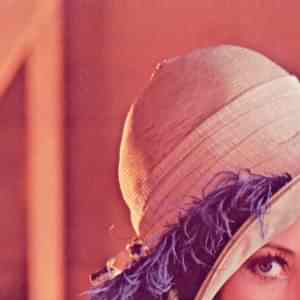

In [14]:
torchvision.transforms.FiveCrop(size=(300, 300))(image)[0]

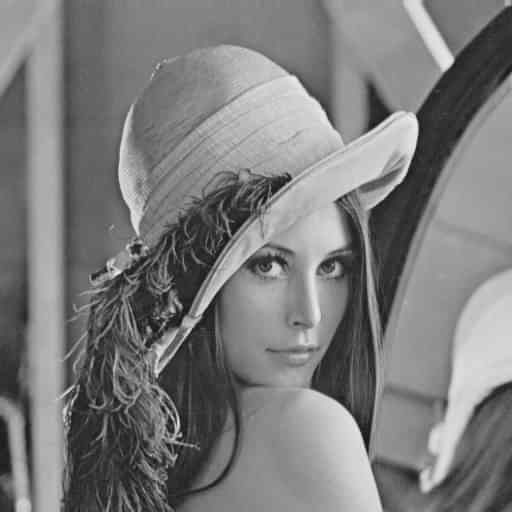

In [15]:
torchvision.transforms.Grayscale(num_output_channels=1)(image)

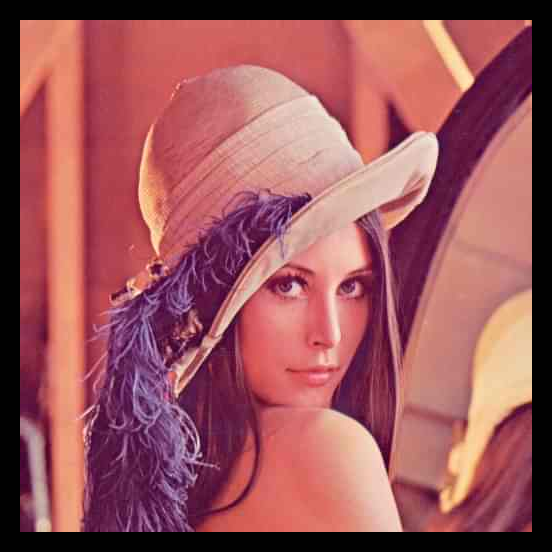

In [16]:
torchvision.transforms.Pad(padding=(20, 20), fill=1, padding_mode='constant')(image)

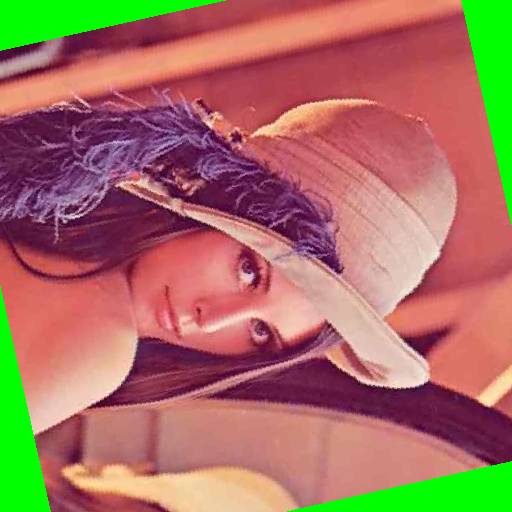

In [17]:
torchvision.transforms.RandomAffine(degrees=90, fill=(0, 255, 0))(image)

In [18]:
transforms = [torchvision.transforms.Grayscale(num_output_channels=1),
              torchvision.transforms.CenterCrop(size=(500, 500)),
              torchvision.transforms.RandomAffine(degrees=90, fill=0)]

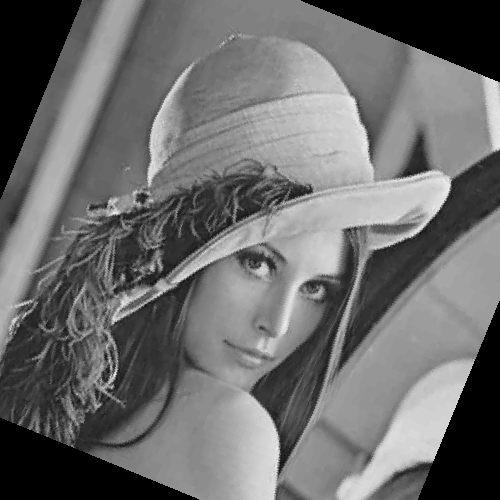

In [19]:
torchvision.transforms.RandomApply(transforms, p=0.5)(image)

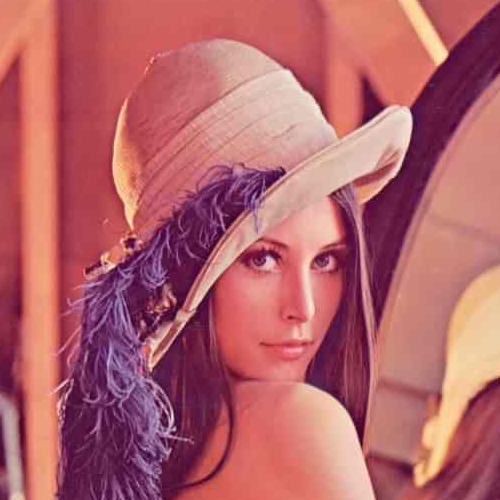

In [20]:
torchvision.transforms.RandomChoice(transforms)(image)

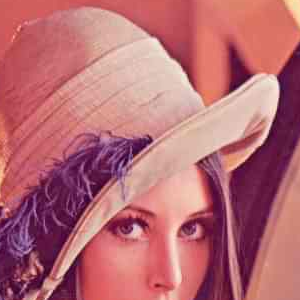

In [21]:
torchvision.transforms.RandomCrop(size=(300, 300))(image)

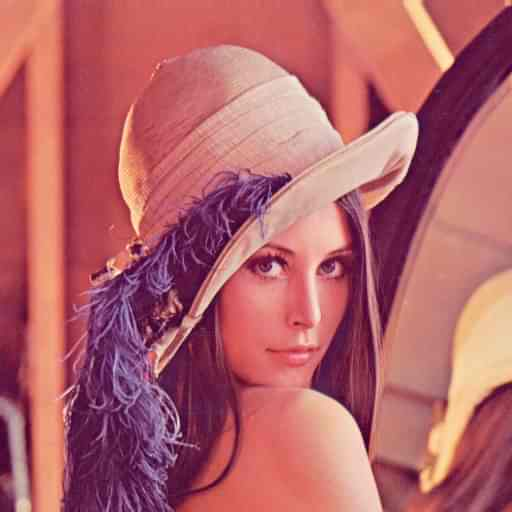

In [22]:
torchvision.transforms.RandomGrayscale(p=0.5)(image)

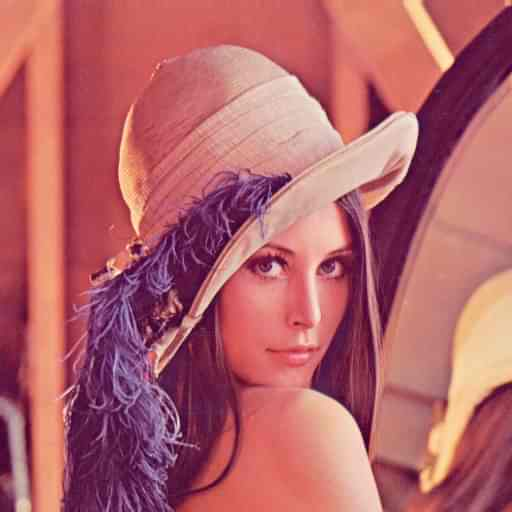

In [23]:
torchvision.transforms.RandomHorizontalFlip(p=0.5)(image)

<interpolation 파라미터 주는 방법>  
1이나 p로 주면 nearest로 주게 된다.
- interpolation=Image.NEAREST
- interpolation=Image.BILINEAR
- interpolation=Image.BICUBIC
- interpolation=Image.LANCZOS

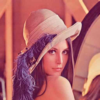

In [30]:
torchvision.transforms.Resize((100, 100))(image)

# Transform on Tensor

In [31]:
tensor = torchvision.transforms.ToTensor()(image)

In [32]:
trans = torchvision.transforms.Normalize(mean=(0, 0, 0), std=(1, 1, 1))(tensor)

In [33]:
np.min(image), np.max(image)

(0, 255)

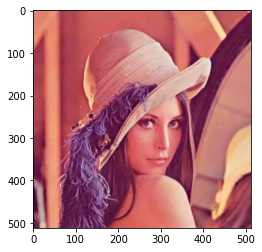

In [41]:
plt.imshow(trans.numpy().transpose(1, 2, 0)) # matplot은 채널이 뒤로가야함
plt.show()

In [43]:
np.min(trans.numpy()), np.max(trans.numpy())

(0.0, 1.0)

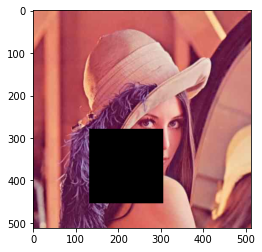

In [47]:
trans = torchvision.transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0)(tensor)

plt.imshow(trans.numpy().transpose(1, 2, 0))
plt.show()